<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/08-Arboles-Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Árboles de Decisión
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos un perceptrón para clasificar un conjunto de datos.

Los paquetes necesarios son:

In [2]:
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización

from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métrica de evaluación
from sklearn.tree import DecisionTreeClassifier, plot_tree

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

,num_links,num_words,has_offer,sender_score,all_caps,is_spam
0,3,98,1,0.718607,0,0
1,0,170,0,0.698901,1,0
2,0,38,0,0.620466,0,0
3,0,116,0,0.701755,0,0
4,3,89,1,0.583621,1,1
...,...,...,...,...,...,...
19995,1,22,1,0.614551,0,0
19996,3,154,0,1.000000,1,1
19997,4,109,0,0.935848,1,0
19998,2,197,0,0.481772,0,0


Esta es la cantida de NA que existe: 
 num_links       0
num_words       0
has_offer       0
sender_score    0
all_caps        0
is_spam         0
dtype: int64
Esta es la estadística descriptiva de los datos: 



,num_links,num_words,has_offer,sender_score,all_caps,is_spam
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,1.497300,109.506150,0.302750,0.694248,0.097800,0.09175
std,1.220478,51.969579,0.459459,0.188312,0.297051,0.28868
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,64.000000,0.000000,0.567073,0.000000,0.00000
50%,1.000000,110.000000,0.000000,0.699740,0.000000,0.00000
75%,2.000000,154.000000,1.000000,0.834083,0.000000,0.00000
max,9.000000,199.000000,1.000000,1.000000,1.000000,1.00000


<Axes: >

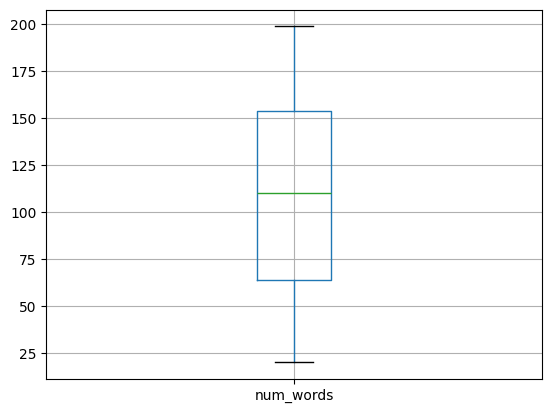

In [3]:
url = "https://raw.githubusercontent.com/Johnny-W-05/Aprendizaje-Automatico/main/dataset/spam_detection_dataset.csv"
df = pd.read_csv(url) #Cargamos los datos
display(df) #Mostramos los datos
#Revisamos si existen na:
print("Esta es la cantida de NA que existe: \n", df.isna().sum())#No tiene NA´s
#Mostramos con estáadística descriptiva los datos
print("Esta es la estadística descriptiva de los datos: \n")
display(df.describe())
#Revisamos con una caja los datos que aparentan más desviación (num_words y num_links)
df.boxplot('num_words')

<Axes: >

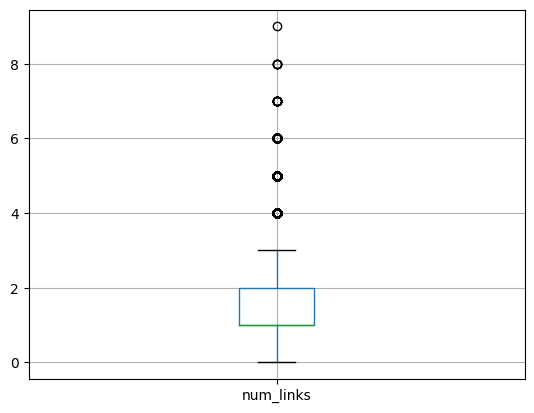

In [4]:

df.boxplot('num_links')

<Axes: xlabel='is_spam'>

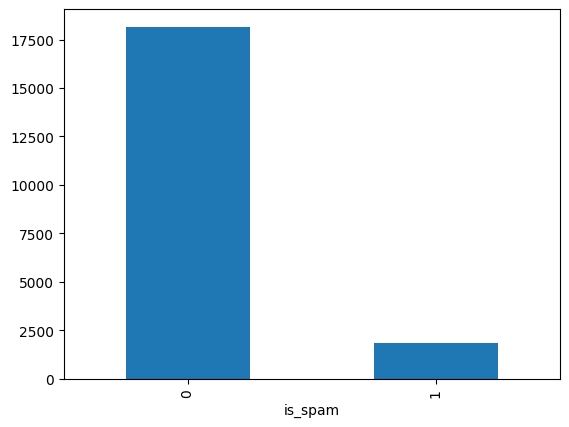

In [5]:
#Y por último de la variable objetivo de este dataset que es is_spam hacemos un barplot por ser categórica
df.is_spam.value_counts().plot(kind='bar')
#Vemos que su distribución es casi todos como no spam y solo algunos como spam.

Dado que los datos en un árbol de decisión no necesitan ser escalados, este paso no se hará.

In [7]:
#finalmente, dividimos en x y y estos valores
X = df.drop('is_spam', axis=1)
y = df['is_spam']


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

In [8]:
# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [9]:
# Crear y entrenar un arbol con ganancia de información
modelo = DecisionTreeClassifier(criterion='entropy')
modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [11]:
X

,num_links,num_words,has_offer,sender_score,all_caps
0,3,98,1,0.718607,0
1,0,170,0,0.698901,1
2,0,38,0,0.620466,0
3,0,116,0,0.701755,0
4,3,89,1,0.583621,1
...,...,...,...,...,...
19995,1,22,1,0.614551,0
19996,3,154,0,1.000000,1
19997,4,109,0,0.935848,1
19998,2,197,0,0.481772,0


In [17]:
modelo.classes_ #Para saber como definir class_names


array([0, 1])

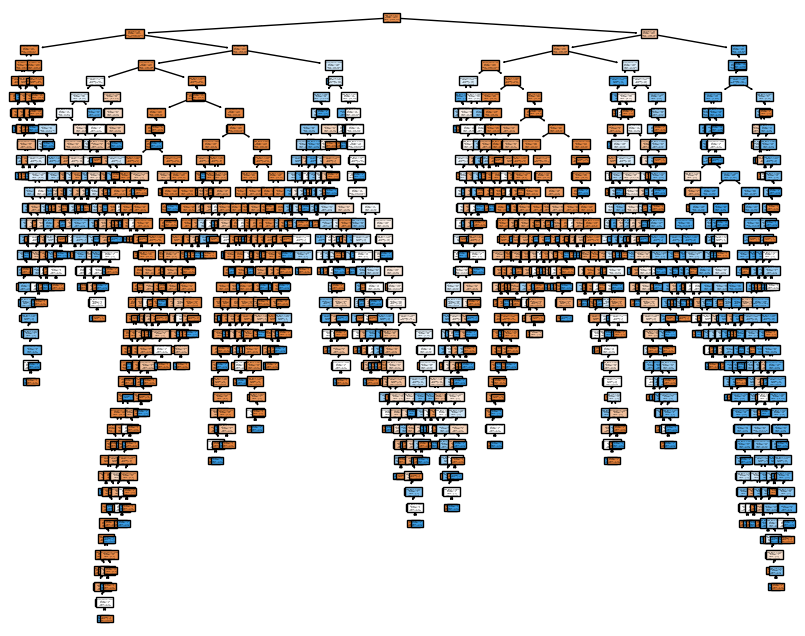

In [18]:
# Visualizar el árbol
plt.figure(figsize=(10, 8))
plot_tree(modelo, feature_names=X.columns, class_names = ['Negativo', 'Positivo'], filled=True)
plt.show()

In [19]:

# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.95
Matriz de confusión:
[[3525  104]
 [ 113  258]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3629
           1       0.71      0.70      0.70       371

    accuracy                           0.95      4000
   macro avg       0.84      0.83      0.84      4000
weighted avg       0.95      0.95      0.95      4000



Aunque este trabajo no pide análisis, podría decir que la razón por la cual no da un modelo perfecto en este caso es por que el arbol no encuentra un umbral general para clasificar los datos, o bien por cada rama añadida el umbral es más corto y por tanto genera tantas ramificaciones. De todos modos, diría que los datos tienen buena precisión a pesar de esto pero por la matriz de coeficientes se debería priorizar más un buen recall.